In [ ]:
# feature selection 하는 이유? => 성능을 좋게 하려고
# 차원의 저주로 접근함
# feature 자체가 컬럼이고 또는 attribute 라고 함. 또 dimension 임
# 컬럼이 많으면 많을수록 뉘앙스가 풍부해져서 좋지만 그에 따른 로우도 많아야 함. 그렇지 않으면 차원의 저주가 발생
# 차원의 저주가 생기면 오버피팅이 발생함.

# 차원의 저주, 즉 오버피팅을 막기 위해서는?
# 제일 좋은 것이 데이터를 많이 모아오는 것.
# 그럴 수 없으니 차원을 줄임. 차원을 줄이는 테크닉은 현재 그 데이터 그대로 사용하는 feature selection 과 데이터를 저차원 형태로 변화시키는
# PCA. 차원 축소

In [ ]:
# 특정데이터에는 특정 알고리즘이 잘된다! -> No Free Lunch
# 쉽게 하나로 묶어서 조절하는 것이 파이프라인. (모델 쪽, 데이터 쪽)
# 성능을 높이기 위해서 데이터 조절과 알고리즘 조절 => 이 둘은 유기적으로 맞물려야 함

In [ ]:
# feature selection 은 3가지 방식
# filter, wrapper, embeded 방식

# embeded 방식(알고리즘 안에 들어있음) -> decision tree
#  => 지니계수, 엔트로피

In [ ]:
# 앙상블
# gradient boosting
# xgb, lgbm 이 하위
# 이것들이 현재 분석기법의 최고봉 -> 다 tree 기반의 앙상블.

In [ ]:
# decision tree 에 배깅한 것이 랜덤포레스트

In [1]:
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer(as_frame=True)

In [3]:
breast = data.frame

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [5]:
dt = DecisionTreeClassifier()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(breast.iloc[:,:-1], breast.target)

In [8]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [9]:
# 알고리즘마다 특색있음 -> 여기서는 tree
dt.feature_importances_
# 이것은 tree 에서 정보량을 많이 가진 기준으로 분류함. 그렇다는 것은 중요한 feature 가 있다는 것을 알고리즘 상에서 계산함.
# 0 은 중요도가 없으니까 빼보자!

array([0.00322398, 0.01600762, 0.        , 0.        , 0.        ,
       0.        , 0.01903806, 0.        , 0.00434834, 0.        ,
       0.        , 0.        , 0.        , 0.01873442, 0.        ,
       0.        , 0.        , 0.        , 0.0080277 , 0.03224846,
       0.02930736, 0.00820177, 0.        , 0.09909971, 0.        ,
       0.        , 0.00981382, 0.7194641 , 0.        , 0.03248464])

[Text(0.6941964285714286, 0.9444444444444444, 'x[27] <= 0.145\ngini = 0.468\nsamples = 426\nvalue = [159, 267]'),
 Text(0.53125, 0.8333333333333334, 'x[23] <= 929.8\ngini = 0.155\nsamples = 284\nvalue = [24, 260]'),
 Text(0.41964285714285715, 0.7222222222222222, 'x[13] <= 48.975\ngini = 0.072\nsamples = 267\nvalue = [10, 257]'),
 Text(0.38392857142857145, 0.6111111111111112, 'x[6] <= 0.12\ngini = 0.059\nsamples = 265\nvalue = [8, 257]'),
 Text(0.26785714285714285, 0.5, 'x[27] <= 0.137\ngini = 0.038\nsamples = 260\nvalue = [5, 255]'),
 Text(0.14285714285714285, 0.3888888888888889, 'x[0] <= 15.52\ngini = 0.016\nsamples = 248\nvalue = [2, 246]'),
 Text(0.07142857142857142, 0.2777777777777778, 'x[21] <= 33.35\ngini = 0.008\nsamples = 245\nvalue = [1, 244]'),
 Text(0.03571428571428571, 0.16666666666666666, 'gini = 0.0\nsamples = 231\nvalue = [0, 231]'),
 Text(0.10714285714285714, 0.16666666666666666, 'x[1] <= 23.2\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.07142857142857142, 0.

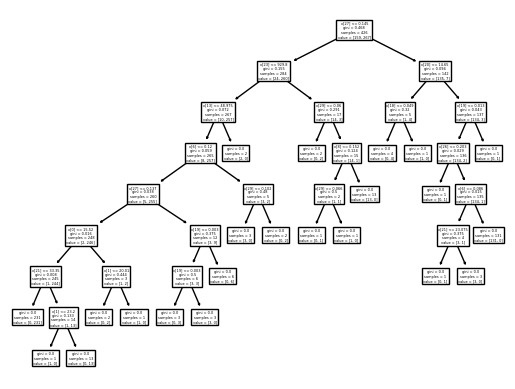

In [19]:
from sklearn.tree import plot_tree
plot_tree(dt)

In [14]:
# 성능측정
dt.score(X_test, y_test)

0.9020979020979021

In [15]:
import numpy as np

In [64]:
np.nonzero(dt.feature_importances_)[0]

array([ 0,  1,  6,  8, 13, 18, 19, 20, 21, 23, 26, 27, 29])

In [20]:
X_re = breast.iloc[:, np.nonzero(dt.feature_importances_)[0]].copy()

In [21]:
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, breast.target)

In [22]:
# 이제 훨씬 줄어든 상태에서 (필요없는 컬럼 없앤 상태)
dt2 = DecisionTreeClassifier()

In [23]:
dt2.fit(X_train_re, y_train_re)

DecisionTreeClassifier()

In [24]:
dt2.score(X_test_re, y_test_re)  # 크기가 엄청 줄었으니 오버피팅 안 걸렸을 것.

0.916083916083916

In [ ]:
# 이 전에 learning curve 그리고 오버피팅 테스트 해봤어야 함.

In [ ]:
# 이렇게 알고리즘 자체에 있는 것을 embeded 기법. tree 라인과 linear 라인이 해당됨.
# 이 아이디어를 가지고 tree로 중요한 feature 뽑고 이 feature를 가지고 다른 알고리즘을 사용할 수도 있음. -> 굉장히 유용한 테크닉임.

In [ ]:
# Occam's Razor 는 간단하면 간단할 수록 좋다는 것.
# 모델관점에서 두가지 이야기를 함(오캄의 면도날)
# first razor, second razor
# 오캄의 면도날도 feature selection 의 embeded 방식과 연관된 개념임.

In [ ]:
# 두번째 filter 방식
# x와 y의 연관된 것. 관련성이 큰 애들만 뽑아가지고 모델 만든 것.
# chi-square -> 범주형 변수에 대한 관련성 보는 것이라고 보면 됨.
# 데이터 관점에서 x 를 선택하는 방식이 filter 방식

In [25]:
# 세번째 wrapper 방식. 2가지 있음.
from sklearn.feature_selection import RFE, SequentialFeatureSelector

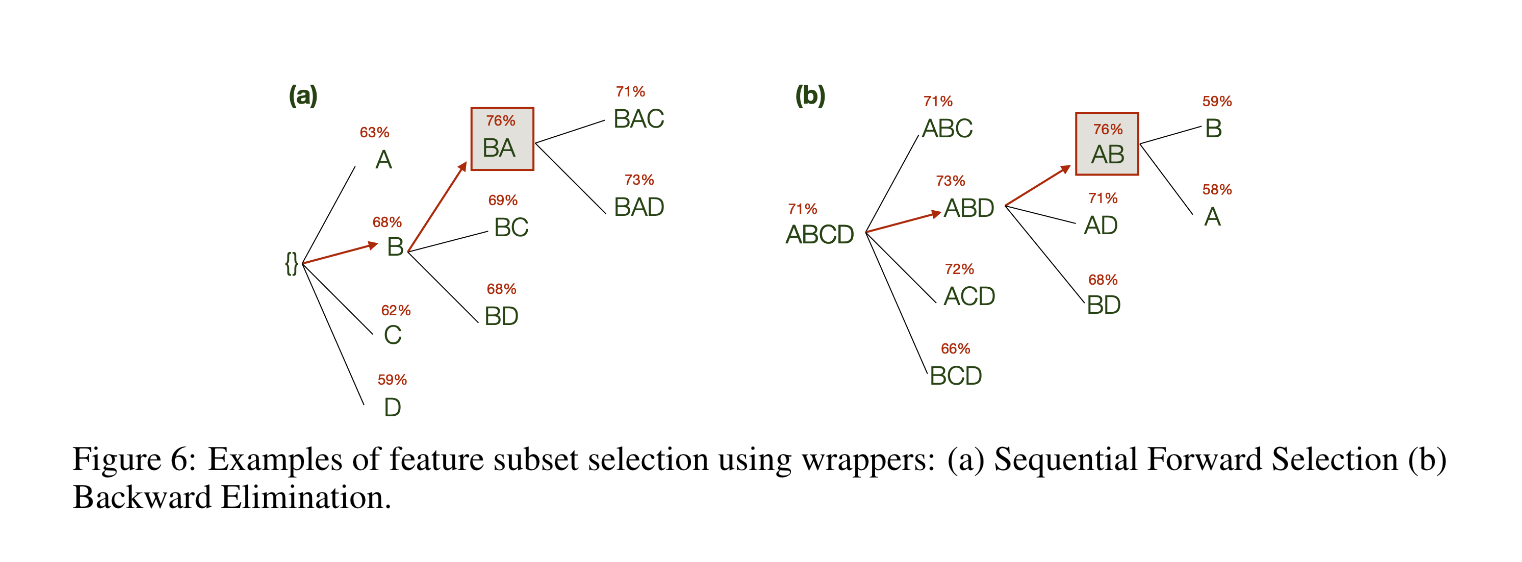

In [ ]:
# 5개의 feature 를 선택하기 위해서 제일 좋은 것 선택 -> 조합 -> 또 제일 좋은 것 선택 -> 조합
# 순차적으로 feature를 선택하는 것. SFS

# 반대로 RPE 는 전체 중에서 하나씩 지워가는 과정.
# a 가 SFS, b가 RPE

In [ ]:
# wrapper 방식은 알고리즘에 따라서. 알고리즘과 함께 어떤 데이터를 사용해야 좋은가를 봄. -> 알고리즘에 따라서 성능 달라짐.
# filter 는 알고리즘과 전혀 상관 없음. 데이터의 관점에서 x, y 관련성만

In [26]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
rfe = RFE(KNeighborsClassifier())

# Init signature:
# RFE(
#     estimator,
#     *,
#     n_features_to_select=None,
#     step=1,
#     verbose=0,
#     importance_getter='auto',
# )

In [28]:
rfe.fit(X_train, y_train)

ValueError: when `importance_getter=='auto'`, the underlying estimator KNeighborsClassifier should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [ ]:
# 알고리즘 성격을 고려
# KNN 은 k에 따라 나하고 가까운 애 k개 선택하고 더 많은 것으로 찾아가는 방식.
# 당연히 feature 개수에 따라 돌아가는 방식이 다르기 때문에 위가 오류남. RFE 는 feature 를 지워가기 때문

In [ ]:
# sklearn 같은 경우 embeded 방식 되는 애들은 wrapper 에 넣으면 됨.
# 즉, 두 방식을 함께 사용하는 것이 더 안전한 방식

In [ ]:
# wrapper 를 search 라고 하기도 함. 제일 좋은 것을 찾아가는 방식이기 때문
# 최적의 가능성을 찾기 때문에.
# search 의 가장 기본적인 방법은 exhaustive search. 다 찾는 것. 처음부터 끝까지. grid search 도 이 한 종류임.
# 이 방법은 continuous 데이터에서 못씀. 그래서 쓰는 테크닉이 randomize => stochastic search

In [29]:
from sklearn.model_selection import RandomizedSearchCV  # 확률분포에서 제일 많이 발생한 애를 선택

In [30]:
!pip install -U feature-engine

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 kB 3.1 MB/s eta 0:00:00 MB/s eta 0:00:01:01


In [ ]:
# 이 세 가지 방식(feature selection-embeded/filter/wrapper)은 변형시키는 것이 아니라 뽑음
# 머신러닝에서 차원을 키우는 테크닉 중에 성공한 것이 딱 하나 있음.
# 딥러닝에서 활성함수가 linear 로 바꾸는 것 -> 나중에 배울 것.
# 2차원 데이터를 3차원으로 바꾸는 것. svm 의 커널 트릭이 거의 유일하게 차원을 늘리는 테크닉.
# 나머지는 거의 다 차원을 줄임. -> 차원을 줄이는 것이 훨씬 이로워서.

# 차원을 어떻게 줄일까?
# 차원을 축소시켜서 분류함

In [31]:
from sklearn.decomposition import PCA

In [ ]:
# n 차원을 변형시켜서 더 낮은 차원으로 바꿈.
# 그러면 값이 바뀌는 문제점이 있음.
# 하지만 차원은 줄어듦. PCA 는 분석에서 보통 제일 마지막에 씀. 값이 변해서

In [32]:
pca = PCA(5)

In [33]:
pca.fit_transform(X_train, y_train)
# 5차원 데이터 값으로 바뀜.
# 차원은 줄었지만 구분할 수 있는 특성은 남아있음.

array([[ 1.30008819e+03,  1.25489205e+02,  1.49785857e+01,
         8.73816225e-01,  5.77965860e+00],
       [-4.46787313e+02,  2.31801748e+01,  1.01902778e+01,
         1.64651078e+00, -3.05041970e-01],
       [-3.89405216e+02,  9.40196588e-01, -2.73190788e+00,
        -1.85676293e+00, -1.82862245e+00],
       ...,
       [-3.62902302e+02,  4.39826776e+01,  1.12192238e+00,
        -3.06430660e+00,  2.43693859e+00],
       [-2.10460286e+02, -3.18239328e+01,  1.48845729e+00,
         6.43953749e+00,  2.76001514e+00],
       [ 5.24049092e+02, -4.44430877e+01,  2.86990305e+01,
        -3.17766534e+00,  3.49360708e+00]])

In [34]:
# manifold assumption 매니폴드 가정.
from sklearn.manifold import TSNE # visualization 기법. 고차원 공간의 특징이 저차원 공간에서 표현 가능하다는 것이 매니폴드 가정
# 딥러닝 오토 인코더에서 이런 개념이 튀어나옴.
# 차원을 확장시키는 것이 svm 의 커널 트릭 -> gpu 연산 안해서 시간 오래 걸림. 그래서 실무에서 잘 안씀. 성능이 나쁘지는 않지만.

In [ ]:
# feature transformation -> 값을 변형시킴 -> 즉 차원을 다른 차원으로 변형시킴.
# PCA, LDA
# 딥러닝에서 차원을 이동시켜서 linear 한 separate 가능하도록.

#### ensemble

In [ ]:
# 딥러닝에서도 앙상블 정말 많이 씀
# 모델을 여러개 사용한 것을 앙상블.
# 가정을 많이 하면 할 수록 성능이 올라감 -> 조건을 계속 붙히기 때문
# 목표에 따라서 맞는 모델을 만들기. -> 1개? 아니다. 여러개 만들어서 선택한다. 이게 일반적인 기계학습 절차 및 목적을 설명하는 것.

In [ ]:
# 모델을 만드는 방법은 2가지 접근
# 모델 한개만 만들어서 처리하는 방법 -> 전통적
# 여러개를 합치는 방법 -> 요즘; 이것을 앙상블이라고 함.

# and/or 방식으로 합침. 목적 자체가 stabilize 안정화.
# 어떤 것이 안정시키는 것? => 안정화되지 않은 모델은 bias. 즉 bias 를 줄일 때 사용하는 기법이 배깅
# 대부분은 성능을 높임. 성능을 높이는데 많이 사용함. 오버피팅 막는 것은 컴퓨터사이언스 쪽에서는 랜덤포레스트가 나오기 전까지는 거의 사용x
# 노이즈에 강건하다는 것들은 오버피팅 관점에서 좋다는 것.

In [ ]:
# 앙상블이 거의 모든 것이 실질적으로는 성능을 올리기 위해서임.
# 논문을 보기 시작하면 어떤 것을 봐야하는지 흐름을 알려준 것.
# 실무에서도 앙상블이 핵심임. 그러나 많이 사용한다고 성능에 좋은 것이 아님.
# 담당하는 영역이 다른 애들을 합쳤을 때는 시너지가 클 것. => diminish return(많이 쓴다고 좋은 것이 아니다!) 수확체감의 효과

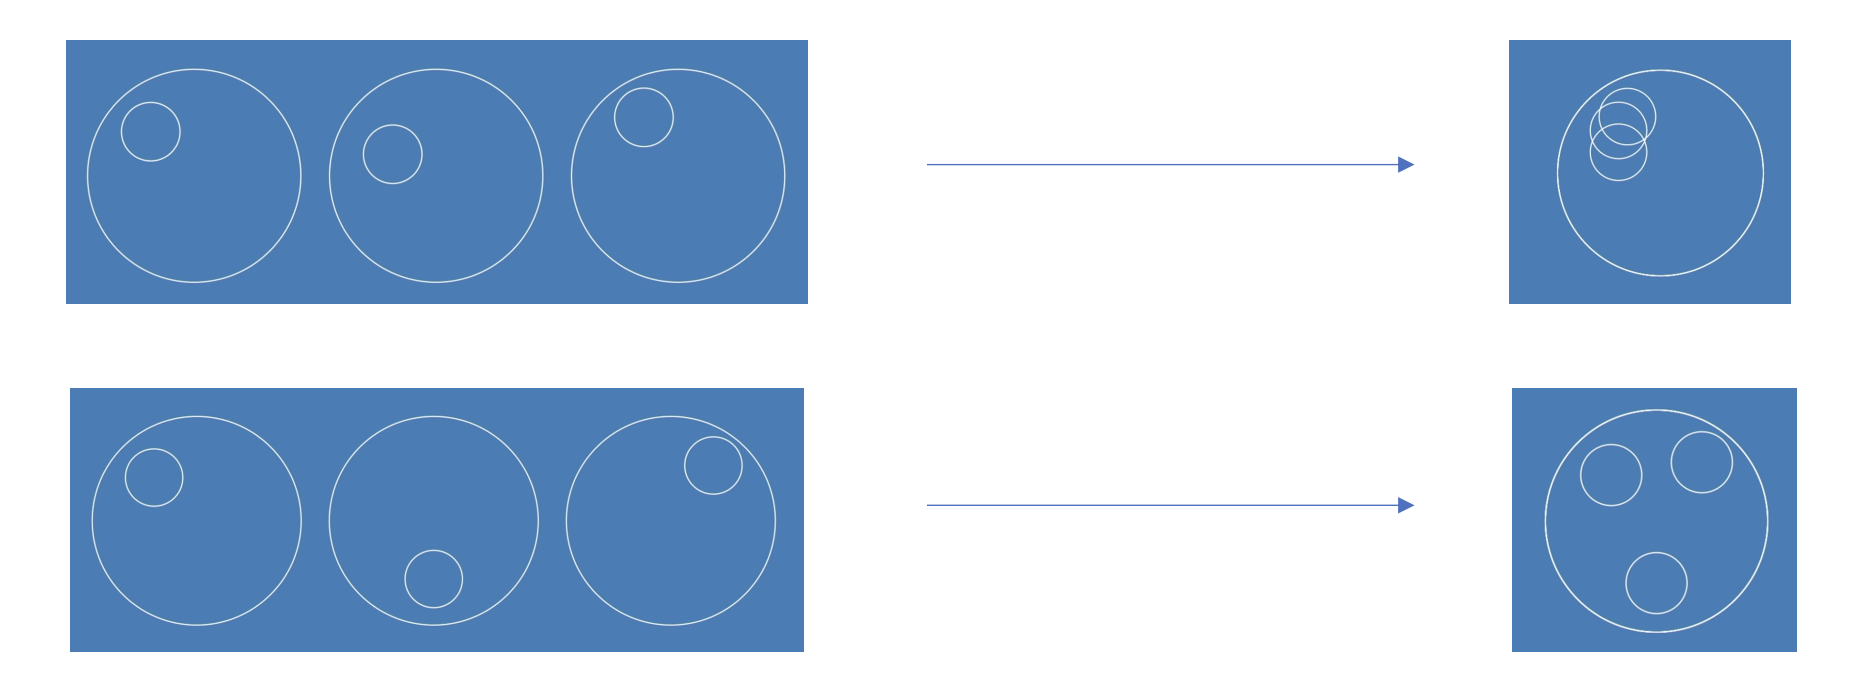

In [35]:
# 어떻게 합칠까가 이제 중요한 문제
# 앙상블은 편차가 클수록 좋음 - 위 그림에서 두번째 케이스
# 각 모델마다 단점이 있는데 이론적으로 합쳤더니 효과가 좋음.
# 그런데 장점이 있으면 단점도 알고 있어야 함.
# 예를 들어 feature selection 은 작으니까 차원의 저주에 좋긴 한데 컬럼이 줄어드니깐 뉘앙스가 작아짐.

In [ ]:
# 모델 관점에서 오캄의 면도날
# 성능이 비슷할 때 간단한게 좋다는 것이 일반적 관점
# 구체화시켰을 때 두 모델들이 일반화된 에러(다 만들고 테스트 에러)가 같다면 더 간단한 것 사용하라는 것(성능이 같을 때)
# 간단한 것은 존재자체가 바람직한 것. 간단한 모델은 적은 데이터가 들어가고 유지보수하기 쉬운 것.
# 조건은 일반화된 성능(테스트 에러)이 같을 때.
# 오버피팅 안 일어날 때 복잡한 애들이 성능이 더 좋음. 즉 위같은 경우가 잘 안일어남.

# 두번째는 트레이닝 에러가 같을 때는, 더 간단한 것 선택하라는 것. 똑같은 트레이닝 받으면,
# 간단하면 할수록 오버피팅 더 작게 일어나니까 나중에 테스트 에러도 작게 일어날 것. => 일반적인 경향

# 이 경향들은 모델 선택할 때 알고 있어야 할 기본적인 법칙!
# 하나의 모델에는 오캄의 면도날이 지배하고 있음 => 즉, 필요한 것 이상으로 크기를 키우지말라는 것.
# 필요한 것은 모델 만들 때 어떤 것을 설명하는 정도.

# 여러 모델 만들 때 간단한 것으로 선택
# 같은 성능일 때는 작은 것을 선택해라! 조건은 같은 트레이닝이나 같은 테스트. 두 관점에서 봐야 한다는 것.
# 그런데 중요시 하는 것은 테스트 관점.

# 한 개의 모델에 들어있는 선택의 기준은 '오캄의 면도날'

In [ ]:
# 딥러닝에서는 크다 작다를 레이어 개수로 판단함.
# 딥러닝에서는 개념이 모호하여 오캄의 면도날을 못쓰는 경우가 많음.
# SVM 은 최소값을 찾는 것이기 때문에, (간단한 것을 찾는 것이) 오캄의 레이저를 잘 지킴. svm 은 실용적으로는 꽝임.
# 베이지안

In [ ]:
# 오캄의 면도날 근사적 모델도 있음
# 오캄의 면도날 사용 전혀 안 한 것 중 대표적인 것이 NN.
# NN은 간단한 모델을 찾는 것이 아님. => non-parametric 모델
# 이 알고리즘들은 간단한게 좋기는 하지만 상관 없음

In [ ]:
# 앙상블
# 모델 한 개의 철학은 오캄의 면도날이 굉장히 중요한 역할을 해서 아예 오캄의 면도날에 영향을 받아서 만들어진 것들도 있음.
# 사실 영향을 받지 않은 것도 있지만 결론적으로 모델 선택할 때는 오캄의 면도날의 철학을 따름.

# 앙상블의 철학은 간단한게 더 좋다는 것이 아님.
# 협력을 어떻게 하냐. 앙상블은 분업이 아니라 협업!!
# 여러개의 모델을 함께 사용하니까 성능이 좋아야 함.
# 여러개 해서 가장 간단한 것은 평균 잡는 것. 여러 모델 해서 평균 잡는 것이 앙상블의 시초.

In [ ]:
# 앙상블에 항상 평균이라고 나오는 이유가, 평균이 편차를 줄이기 때문. 평균 잡는 것이 가장 기본적인 생각.
# 평균 잡을 때도 어떤 평균? micro average, macro average, weighted average.
# 평균을 통해서 거꾸로 진실을 얻을 수 있다는 것.
# 여러개 합쳐서 만든다.
# 하나의 모델로 현실을 모두 설명하는 것은 불가능함.
# 딥러닝은 하나의 모델이 아님. 앙상블.
# 논문에서 모델들에 s 붙은 이유가 앙상블을 사용했기 때문.

In [ ]:
# 랜덤성을 가진 것과 랜덤성을 가지지 않은 것으로 두가지 분류 가능
# 우리는 다른 분류를 씀. 데이터를 혼합시켜 만들지 vs 모델을 혼합시켜 만들지 vs 함께 혼합시켜 만들지.
# 이 세가지 분류에 랜덤성을 또 분류.

In [ ]:
# k-fold Cross-Validation
# Bootstrap Aggregation(Bagging)
# Random Training Subset

In [37]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

In [ ]:
# cross_val_predict 이게 앙상블

In [38]:
cross_val_predict(KNeighborsClassifier(), breast.iloc[:,:-1], breast.target, cv=5)
# 5개 모델 만든 것.
# 4개는 트레이닝 1개는 테스트
# 총 모델은 5개. 그 5개 나온 애들이 각각 이 데이터에 이렇게 예측하겠다! -> 이게 앙상블.
# 많이 나온 것 투표하는 것이 cross_val_predict
# 모델을 꺼내 쓰기 위해서 데이터 쪼개는 테크닉 배움

array([0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,

In [39]:
# 모델을 꺼내 쓰기 위해서 데이터 쪼개는 테크닉 배움
from sklearn import model_selection

In [40]:
[x for x in dir(model_selection) if 'Fold' in x]

['GroupKFold',
 'KFold',
 'RepeatedKFold',
 'RepeatedStratifiedKFold',
 'StratifiedGroupKFold',
 'StratifiedKFold']

In [41]:
from sklearn.model_selection import KFold

In [42]:
k = KFold(5)

In [44]:
a = k.split(breast.iloc[:,:-1], breast.target)

In [65]:
next(a)
# 5개 만들었기 때문에 5개 튀어나옴.
# 5개의 모델이 만들어짐. => cross-validation 을 통해서 앙상블을 만든 것.

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 228, 229, 230,
        231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243,
        244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
        257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
        270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282,
        283, 284, 285, 286, 287, 288, 289, 290, 291

In [ ]:
# 크게 보면 같은 전체 데이터 안에서 다른 데이터 형태를 써서 모델을 만듦 -> 아주 효율적 방식은 아님
# 이게 첫번째 방법임.
# k-fold Cross-Validation

In [ ]:
# Random Training Subset
# 이게 train_test_split 과 비슷.
# 이걸 할 때마다 random_state 가 있어서 랜덤하게 바뀜.
# 랜덤하게 몇 번 쪼개서 데이터를 만드는 것.
# 이럴 때 3way 테크닉을 씀
# train_test_split 이 hold-out(2way)
# train, validation, test 로 쪼개면 3way hold-out
# train 을 또 쪼갬

In [46]:
X_train, X_test, y_train, y_test = train_test_split(breast.iloc[:,:-1], breast.target)  # 2way hold-out

In [ ]:
# train 데이터를 또 쪼개면 validation 이 되는 것. 3way hold-out
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [ ]:
# 3way hold-out 는 같은 데이터지만 사용하는 데이터는 다름. 따라서 mixing training data

In [ ]:
# Bootstrap Aggregation(Bagging)
# 이게 핵심
# 이것은 첫번째, 세번째와 성격이 조금 다름.
# bootstrap 이 뭘까?
# 통계에서는 샘플링 방식.
# 복원추출(wr), 비복원추출(wor); 중복 허락의 개념
# 부트스트랩은 복원추출을 반복적으로 하는 것.

In [47]:
from sklearn.utils import resample

In [50]:
resample([1,2,3,4,5,6,7,8,9])
# Signature:
# resample(
#     *arrays,
#     replace=True,
#     n_samples=None,
#     random_state=None,
#     stratify=None,
# )

# 중복을 허락해서 뽑혀있음. 이렇게 뽑는 것을 복원추출

[8, 2, 3, 4, 8, 9, 5, 9, 5]

In [ ]:
# 배깅은 부트스트랩 aggregation. 즉 합치는 것.
# 부트스트랩으로 데이터 만들고 그 데이터로 모델 만들고 합친다.
# regression 은 연속이니까 평균, classification 은 voting 함.
# 평균의 장점이 분산을 줄이는 것. 분산을 줄인다는 것은 다른 말로 하면 모델의 안정성을 향상시킴. => 배깅
# 이것은 variance 줄이는 역할로 쓰임.
# 랜덤성이 대표성을 의미할 때가 있음.

In [ ]:
# 배깅과 비슷하게 나왔던 애가 있는데 그게 부스팅.
# 부스팅은 아직도 살아남음.
# 부스팅 들어가기 전에 보팅(voting)을 먼저 하자

In [ ]:
# 분류는 보팅
# 보팅 => 하드/소프트(애버리지)
# 하드는 투표결과대로 분류
# 소프트는 averaging 이라고도 함. 평균내서 분류
# weighted까지 있음

In [ ]:
# 이론과 실제의 간극이 아주 큼. 상황에 맞게 써볼 것. 그렇게 성능을 향상시키는 것.

In [ ]:
# 하이퍼파라미터 튜닝
# numerical stability -> 특정 인풋을 하면 결과값이 안나오는 경우가 있음. 소프트 맥스가 그렇다.
# 소프트 맥스를 numerical stablable 하게 만들어야 함.

# 초기값에 따라서 모델의 형태가 달라질 수 있음.
# 같은 모델인데 하이퍼파라미터만 바꾸면 다른 모델이 됨. 그렇게 여러 모델을 만들고 합칠 수 있음

In [ ]:
# 앙상블은 모델간 편차가 크면 좋음.
# 같은 모델인데 하이퍼파라미터 다르게 해서 다른 모델 만드는 것은 딥러닝에서 주로 쓰임. 데이터 달라도 다른 모델임.

In [ ]:
# 랜덤 포레스트는 의사결정나무를 배깅을 해서 여러 모델을 합친 것을 랜덤 포레스트라고 함.

In [ ]:
# different checkpoints of a single model => 딥러닝에서만 쓰임
# learning rate 워밍업.
# 스냅샷

In [52]:
# voting부터 해보자
from sklearn.ensemble import VotingClassifier
# 머신러닝에서는 홀수를 선호함. 짝수에서는 동일한 결과를 가져올 수도 있기 때문에.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [53]:
vc = VotingClassifier([('knn', KNeighborsClassifier()),
                       ('lr', LogisticRegression()),
                       ('tree', DecisionTreeClassifier())])
# Init signature:
# VotingClassifier(
#     estimators,   => s 가 붙으면 list 형태로 씀
#     *,
#     voting='hard',
#     weights=None,
#     n_jobs=None,
#     flatten_transform=True,
#     verbose=False,
# )

# estimators : list of (str, estimator) tuples
#     Invoking the ``fit`` method on the ``VotingClassifier`` will fit clones
#     of those original estimators that will be stored in the class attribute
#     ``self.estimators_``. An estimator can be set to ``'drop'`` using
#     :meth:`set_params`.

In [ ]:
# 위에서 이름을 쓰는 이유가 있음 => 이름 - 알고리즘 조합
# 4가지 하이퍼 파라미터 튜닝 법이 있음.

In [54]:
vc.get_params()  # 하이퍼 파라미터에 내가 지은 이름이 __ 앞에 붙음. 새로운 이름을 부여받은 것.

{'estimators': [('knn', KNeighborsClassifier()),
  ('lr', LogisticRegression()),
  ('tree', DecisionTreeClassifier())],
 'flatten_transform': True,
 'n_jobs': None,
 'verbose': False,
 'voting': 'hard',
 'weights': None,
 'knn': KNeighborsClassifier(),
 'lr': LogisticRegression(),
 'tree': DecisionTreeClassifier(),
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'uniform',
 'lr__C': 1.0,
 'lr__class_weight': None,
 'lr__dual': False,
 'lr__fit_intercept': True,
 'lr__intercept_scaling': 1,
 'lr__l1_ratio': None,
 'lr__max_iter': 100,
 'lr__multi_class': 'auto',
 'lr__n_jobs': None,
 'lr__penalty': 'l2',
 'lr__random_state': None,
 'lr__solver': 'lbfgs',
 'lr__tol': 0.0001,
 'lr__verbose': 0,
 'lr__warm_start': False,
 'tree__ccp_alpha': 0.0,
 'tree__class_weight': None,
 'tree__criterion': 'gini',
 'tree__max_depth': None,
 'tree__max_features': None,

In [55]:
class A:
    __x = 3

In [57]:
dir(A)

['_A__x',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__']

In [58]:
A._A__x   # 데이터 wrangling 랭글링

3

In [ ]:
# 이름 붙히는 것은 numpy 에서 봄. 컬럼의 이름을 써주는 관례

In [59]:
vc.fit(X_train, y_train)

/Users/baekkwanghyun/miniconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('knn', KNeighborsClassifier()),
                             ('lr', LogisticRegression()),
                             ('tree', DecisionTreeClassifier())])

In [60]:
vc.predict(X_test)
# 예측 어떻게 했는지 => 이제는 어떤 애가 어떻게 예측?

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [61]:
# 이제는 어떤 애가 어떻게 예측? => transform 활용!
vc.transform(X_test)

array([[1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 0, 0],
       [1, 1, 0],
       [0, 0, 0],
       [0, 0, 0],
       [1, 1, 1],
       [1, 0, 1],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 0],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [0, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 1],
       [1, 1, 0],
       [1,

In [62]:
vc = VotingClassifier([('knn', KNeighborsClassifier()),
                       ('lr', LogisticRegression()),
                       ('tree', DecisionTreeClassifier())],
                     weights=[3,1,1])   # weight 는 투표권 knn이 던진 한표는 3표로 변신한다는 것.
# soft 냐 hard 냐.
# votingclassifier 의 하이퍼 파라미터 튜닝이 가능.
# 어떤 식으로 voting 하면 성능 가장 좋을지 => 그런데 이런 짓 잘 안함. diminish return. voting으로 성능향상이 거의 없기 때문